# Fasrecon: Your Daily Fashion Recommendation
## Cloth Classification

## Import Dasaset from Kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

print("Path to dataset files:", path)

100%|██████████| 565M/565M [00:28<00:00, 20.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1


## Library

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf


#img
from PIL import Image

#plot
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
%matplotlib inline
import plotly.graph_objects as go


# Data Preprocessing

In [3]:
images_dir = os.path.join(path, "images/")
csv_path = os.path.join(path,"styles.csv")

In [4]:
csv_path

'/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/styles.csv'

In [5]:
df = pd.read_csv(csv_path, on_bad_lines="skip")
print(f"Rows: {df.shape[0]} ||| Columns: {df.shape[1]}")

Rows: 44424 ||| Columns: 10


In [6]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [7]:
df = df.dropna()
df.nunique()
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0
productDisplayName,0


In [9]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('--------------')

id
[15970 39386 59263 ... 18842 46694 51623]
--------------
gender
['Men' 'Women' 'Boys' 'Girls' 'Unisex']
--------------
masterCategory
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
--------------
subCategory
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
--------------
articleType
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'For

In [10]:
len(df)

44077

In [11]:
value_counts = df['articleType'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <200:
        break

types_used = indexes[:i]
print('Article types used: ',types_used)

Article types used:  Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses', 'Wallets',
       'Flip Flops', 'Sandals', 'Briefs', 'Belts', 'Backpacks', 'Socks',
       'Formal Shoes', 'Perfume and Body Mist', 'Jeans', 'Shorts', 'Trousers',
       'Flats', 'Bra', 'Dresses', 'Sarees', 'Earrings', 'Deodorant',
       'Track Pants', 'Clutches', 'Sweatshirts', 'Caps', 'Nail Polish',
       'Sweaters', 'Ties', 'Lipstick', 'Jackets', 'Innerwear Vests', 'Kurtis',
       'Tunics'],
      dtype='object', name='articleType')


In [12]:
value_counts = df['baseColour'].value_counts()

indexes = value_counts.index

values = value_counts.values

for i in range(len(value_counts)):

    if values[i] <800:
        break

colours_used = indexes[:i]
print('Base Colours used: ',colours_used)

Base Colours used:  Index(['Black', 'White', 'Blue', 'Brown', 'Grey', 'Red', 'Green', 'Pink',
       'Navy Blue', 'Purple', 'Silver'],
      dtype='object', name='baseColour')


In [13]:
df = df[df['articleType'].isin(types_used)]
df = df[df['baseColour'].isin(colours_used)]

In [14]:
len(df)

34174

In [15]:
# pick some data from articletype
df['articleType'].value_counts()

,count
articleType,
Tshirts,6137
Shirts,2938
Casual Shoes,2584
Watches,2225
Sports Shoes,1969
Tops,1391
Handbags,1369
Kurtas,1365
Heels,951


In [16]:
#drop lipsticks, sarees, deodorant, earrings, perfume and boy mist, kurtas, bra in article type columns
df = df[~df['articleType'].isin(['Lipstick','Sarees','Deodorant','Earrings','Perfume and Body Mist','Kurtas','Bra', 'Sunglasses', 'Kurtis', 'Wallets', 'Watches', 'Belts'])]

In [17]:
len(df)

26046

In [18]:
df['articleType'].value_counts()

,count
articleType,
Tshirts,6137
Shirts,2938
Casual Shoes,2584
Sports Shoes,1969
Tops,1391
Handbags,1369
Heels,951
Flip Flops,830
Sandals,805


In [19]:
# pick maximum 600 image from each artycle category
df = df.groupby('articleType').head(600)

In [20]:
print(len(df))
df

12290


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...
44365,23455,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Deni Yo Men Blue Washed Slim Fit Jeans
44368,37267,Girls,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,United Colors of Benetton Girls Red Printed Dress
44372,10445,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Flying Machine Men Midrise Blue Jeans
44400,10021,Men,Apparel,Bottomwear,Shorts,White,Spring,2013.0,Sports,Nike Men As Woven Shor White Shorts


In [21]:
df['articleType'].value_counts()

,count
articleType,
Shirts,600
Jeans,600
Tshirts,600
Socks,600
Tops,600
Casual Shoes,600
Flip Flops,600
Handbags,600
Formal Shoes,600


In [22]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...
44365,23455,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Deni Yo Men Blue Washed Slim Fit Jeans
44368,37267,Girls,Apparel,Dress,Dresses,Red,Summer,2012.0,Casual,United Colors of Benetton Girls Red Printed Dress
44372,10445,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Flying Machine Men Midrise Blue Jeans
44400,10021,Men,Apparel,Bottomwear,Shorts,White,Spring,2013.0,Sports,Nike Men As Woven Shor White Shorts


## Convert image to fit models inputs

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array
data = []
IX = 96
IY = 64

invalid_ids = []
for name in df.id:

    try:
        img_bytes = tf.io.read_file(images_dir + str(name)+'.jpg')
        img = tf.image.decode_image(img_bytes, channels=3) # channels=3 for RGB
        resized_img = tf.image.resize(img, (IX,IY))
        data.append(resized_img)
    except:
        # if id is missing, append to invalid_ids array
        invalid_ids.append(name)

In [24]:
print('invalid ids:')
print(invalid_ids)

invalid ids:
[39403, 39401]


## Labelling The Dataset

In [25]:
labels = []

used_columns = ['articleType','baseColour']
# labeling columns
for index, row in df.iterrows():

    if row['id'] in invalid_ids:
        continue

    tags = []

    for col in used_columns:
        tags.append(row[col])

    labels.append(tags)

In [26]:
# convert image data to array
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(labels)

[['Shirts' 'Navy Blue']
 ['Jeans' 'Blue']
 ['Track Pants' 'Black']
 ...
 ['Jeans' 'Blue']
 ['Shorts' 'White']
 ['Innerwear Vests' 'Green']]


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

# labeling binary
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

print(mlb.classes_)
print(labels[0])

['Backpacks' 'Black' 'Blue' 'Briefs' 'Brown' 'Caps' 'Casual Shoes'
 'Clutches' 'Dresses' 'Flats' 'Flip Flops' 'Formal Shoes' 'Green' 'Grey'
 'Handbags' 'Heels' 'Innerwear Vests' 'Jackets' 'Jeans' 'Nail Polish'
 'Navy Blue' 'Pink' 'Purple' 'Red' 'Sandals' 'Shirts' 'Shorts' 'Silver'
 'Socks' 'Sports Shoes' 'Sweaters' 'Sweatshirts' 'Ties' 'Tops'
 'Track Pants' 'Trousers' 'Tshirts' 'Tunics' 'White']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Model Architecture

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

inputShape = (IX, IY, 3)
num_classes = 39  # Replace with your number of classes

model = tf.keras.Sequential([
    # Block 1
    Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation="relu"),
    BatchNormalization(),  # Add Batch Normalization
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3 (Optional, depending on complexity and data)
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),  # Increased units
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout

    Dense(num_classes, activation='sigmoid') # Sigmoid for multi-label
])

learning_rate = 0.001  # Set your desired learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', # Binary crossentropy for multi-label
              optimizer=optimizer,
              metrics=['binary_accuracy'])  # Use binary accuracy for multi-label

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 96, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 96, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 48, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 8, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,867,335 (7.12 MB)

 Trainable params: 1,866,183 (7.12 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [30]:
from sklearn.model_selection import train_test_split

# splitting data into testing and training set

(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.15, random_state=42)

In [31]:
batch = 32
E = 100

#training the model
history = model.fit(x=trainX,y=trainY,
          epochs=E ,verbose=1)

Epoch 1/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - binary_accuracy: 0.7088 - loss: 0.5597
Epoch 2/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - binary_accuracy: 0.9618 - loss: 0.1138
Epoch 3/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - binary_accuracy: 0.9669 - loss: 0.0952
Epoch 4/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - binary_accuracy: 0.9685 - loss: 0.0890
Epoch 5/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - binary_accuracy: 0.9707 - loss: 0.0816
Epoch 6/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - binary_accuracy: 0.9730 - loss: 0.0753
Epoch 7/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - binary_accuracy: 0.9739 - loss: 0.0714
Epoch 8/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - binary_accuracy: 0.9754 - loss: 0.0676
Epoch 9/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - binary_accuracy: 0.9774 - loss: 0.0634
Epoch 10/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - binary_accuracy: 0.9768 - loss: 0.0622
Epoch 11/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 

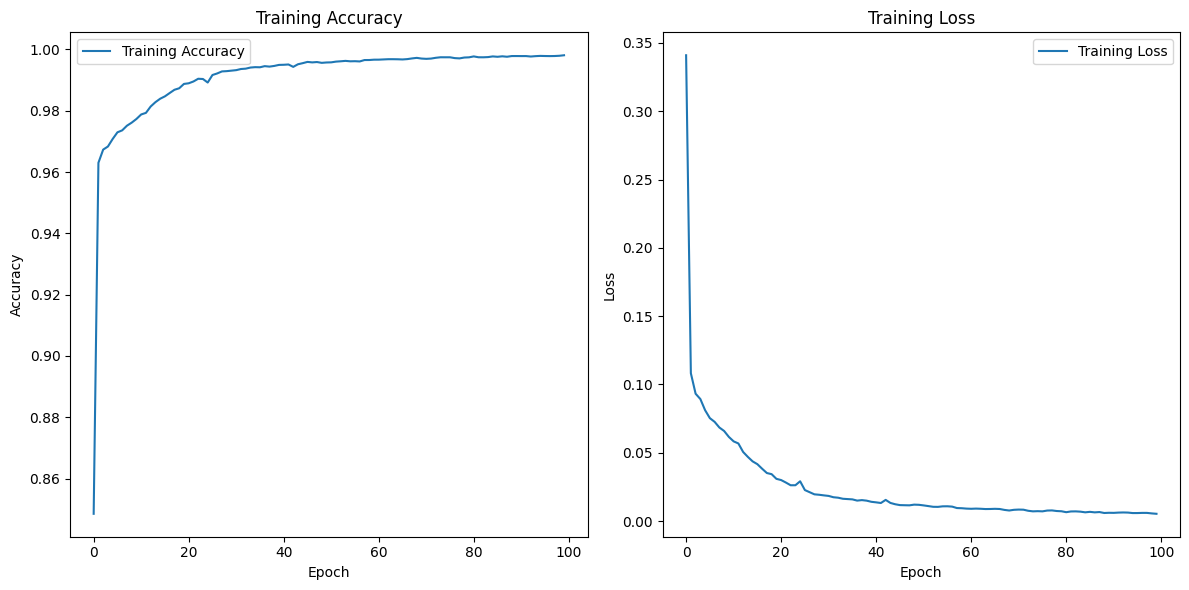

In [34]:
import matplotlib.pyplot as plt

def plot(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plot function with your model's training history
plot(history)


In [35]:
#Save model to h5 extension
model.save("model.h5")

## Testing the model

In [39]:
preds = model.predict(testX)


# since the predictions of the model are sigmoid, we will first binarize them to 0 or 1
pred_binarized = []

for pred in preds:
    vals = []
    for val in pred:
        if val > 0.05:
            vals.append(1)
        else:
            vals.append(0)
    pred_binarized.append(vals)

pred_binarized = np.array(pred_binarized)


# we convert the output vectors to the predicted labels
true_test_labels = mlb.inverse_transform(testY)
pred_test_labels = mlb.inverse_transform(pred_binarized)

correct = 0
wrong = 0

# Evaluating the predictions of the model

for i in range(len(testY)):

    true_labels = list(true_test_labels[i])
    pred_labels = list(pred_test_labels[i])

    label1 = true_labels[0]
    label2 = true_labels[1]

    if label1 in pred_labels:
        correct+=1
    else:
        wrong+=1

    if label2 in pred_labels:
        correct+=1
    else:
        wrong+=1



print('correct: ', correct)
print('missing/wrong: ', wrong)
print('Accuracy: ',correct/(correct+wrong))

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
correct:  2967
missing/wrong:  721
Accuracy:  0.8045010845986985


In [41]:
for i in range(20):
    print('True labels: ',true_test_labels[i],' Predicted labels: ',pred_test_labels[i])

True labels:  ('Sports Shoes', 'White')  Predicted labels:  ('Sports Shoes', 'White')
True labels:  ('Grey', 'Shirts')  Predicted labels:  ('Shirts',)
True labels:  ('Backpacks', 'Red')  Predicted labels:  ('Backpacks', 'Red')
True labels:  ('Black', 'Sweatshirts')  Predicted labels:  ('Black', 'Sweatshirts')
True labels:  ('Blue', 'Casual Shoes')  Predicted labels:  ('Casual Shoes', 'Grey', 'Navy Blue')
True labels:  ('Navy Blue', 'Shirts')  Predicted labels:  ('Navy Blue', 'Shirts')
True labels:  ('Black', 'Tops')  Predicted labels:  ('Black', 'Tops')
True labels:  ('Sports Shoes', 'White')  Predicted labels:  ('Black', 'Sports Shoes')
True labels:  ('Sports Shoes', 'White')  Predicted labels:  ('Grey', 'Sports Shoes')
True labels:  ('Black', 'Tunics')  Predicted labels:  ('Green',)
True labels:  ('Grey', 'Trousers')  Predicted labels:  ('Black', 'Trousers')
True labels:  ('Navy Blue', 'Sweaters')  Predicted labels:  ('Sweaters',)
True labels:  ('Blue', 'Shirts')  Predicted labels:  

## Testing user inputs

In [ ]:
#Preprocessing input
import cv2
dummy = []
img_bytes = tf.io.read_file('shirt.jpeg')
img = tf.image.decode_image(img_bytes, channels=3) # channels=3 for RGB
resized_img = tf.image.resize(img, (IX,IY))
dummy.append(resized_img)
dummy = np.array(dummy, dtype="float") / 255.0

In [60]:
dummy

array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]

In [61]:
pred1 = model.predict(dummy)
print(pred1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[4.1849512e-06 5.1397410e-07 2.0516627e-08 1.5457375e-07 4.8949824e-12
  4.8150733e-10 1.7109871e-09 5.4292743e-10 5.4016647e-07 9.1703284e-11
  2.1347743e-07 8.6518865e-12 9.9976021e-01 3.0156940e-08 3.7061641e-06
  6.1727873e-11 5.3076092e-03 5.4175183e-07 7.7902414e-11 1.4833733e-09
  1.6806809e-05 1.8640008e-10 1.4221424e-09 2.8717174e-04 2.7416874e-11
  4.5478028e-08 6.4175303e-08 3.7566725e-12 1.1518288e-07 3.1747680e-09
  2.9939762e-04 5.3684829e-08 3.4947032e-09 5.4581758e-08 5.4750878e-08
  1.7922853e-09 1.2650364e-04 4.4953259e-07 5.1938823e-08]]


In [62]:
pred_binarized = []

for pred in pred1:
    vals = []
    print(pred)
    for val in pred:
        if val > 0.05:
            vals.append(1)
        else:
            vals.append(0)
    pred_binarized.append(vals)

pred_binarized = np.array(pred_binarized)
mlb.inverse_transform(pred_binarized)

[4.1849512e-06 5.1397410e-07 2.0516627e-08 1.5457375e-07 4.8949824e-12
 4.8150733e-10 1.7109871e-09 5.4292743e-10 5.4016647e-07 9.1703284e-11
 2.1347743e-07 8.6518865e-12 9.9976021e-01 3.0156940e-08 3.7061641e-06
 6.1727873e-11 5.3076092e-03 5.4175183e-07 7.7902414e-11 1.4833733e-09
 1.6806809e-05 1.8640008e-10 1.4221424e-09 2.8717174e-04 2.7416874e-11
 4.5478028e-08 6.4175303e-08 3.7566725e-12 1.1518288e-07 3.1747680e-09
 2.9939762e-04 5.3684829e-08 3.4947032e-09 5.4581758e-08 5.4750878e-08
 1.7922853e-09 1.2650364e-04 4.4953259e-07 5.1938823e-08]


[('Green',)]